In [14]:
# Data manipulation
import pandas as pd
import numpy as np

# Load dataset
from sklearn.datasets import load_iris

In [15]:
# Load the dataset
iris = load_iris()

In [16]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [17]:
# Create DataFrame with feature names
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add species label (0, 1, 2)
df['species'] = iris.target

# Map numeric labels to species names
label_map = dict(enumerate(iris.target_names))
df['species'] = df['species'].map(label_map)

In [18]:
# Dataset structure
# Check number of rows and columns
print("Dataset shape:", df.shape)

Dataset shape: (150, 5)


In [19]:
# Preview the first few rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
# Data types and non-null count
df.info()

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [21]:
# Summary stats for numerical columns
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
# Number of samples per species
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: for cleaner plots in notebooks
%matplotlib inline
sns.set(style="whitegrid")

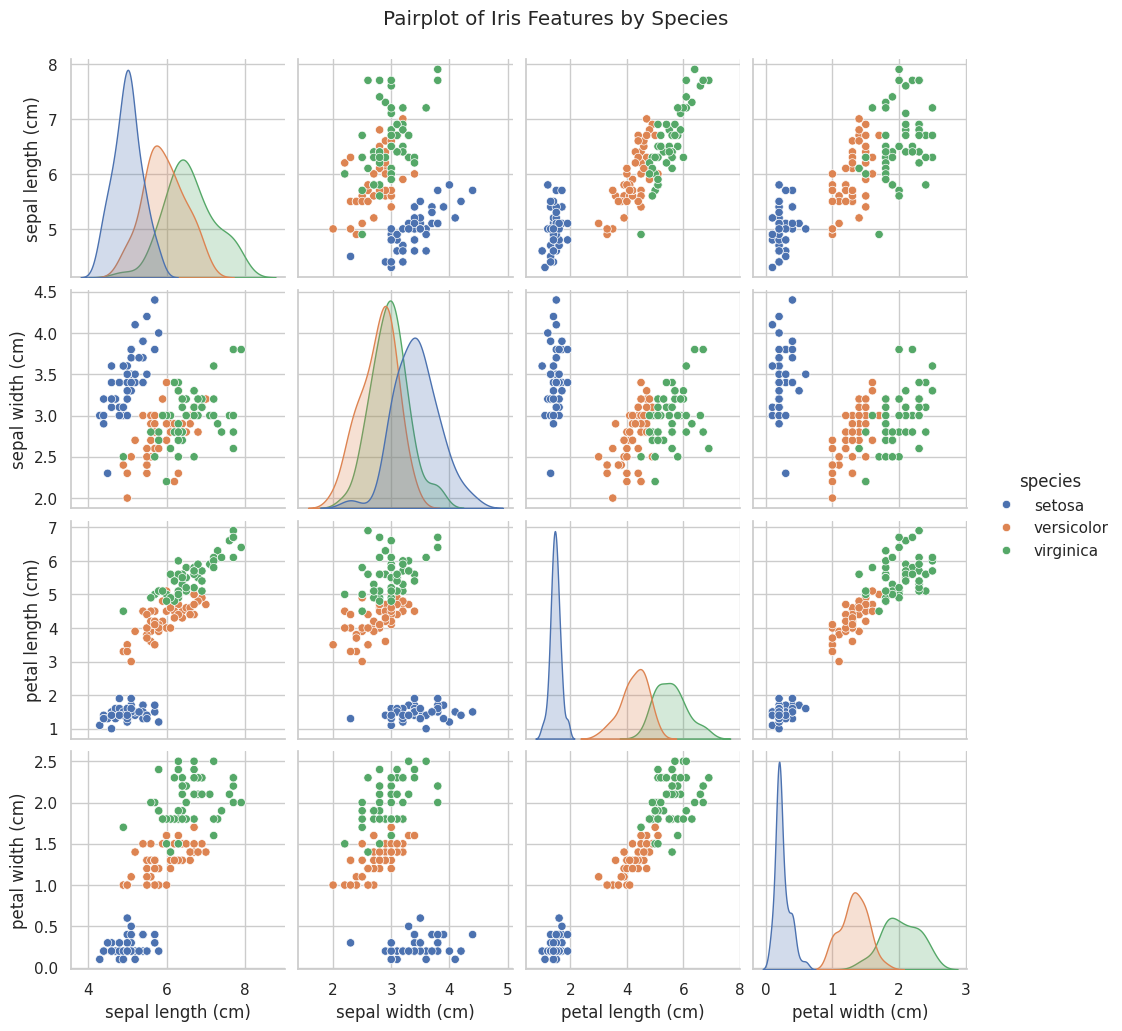

In [24]:
# Pairplot
pairplot = sns.pairplot(df, hue='species', height=2.5)
pairplot.fig.suptitle("Pairplot of Iris Features by Species", y=1.03)  # y > 1 to move title up
plt.show()


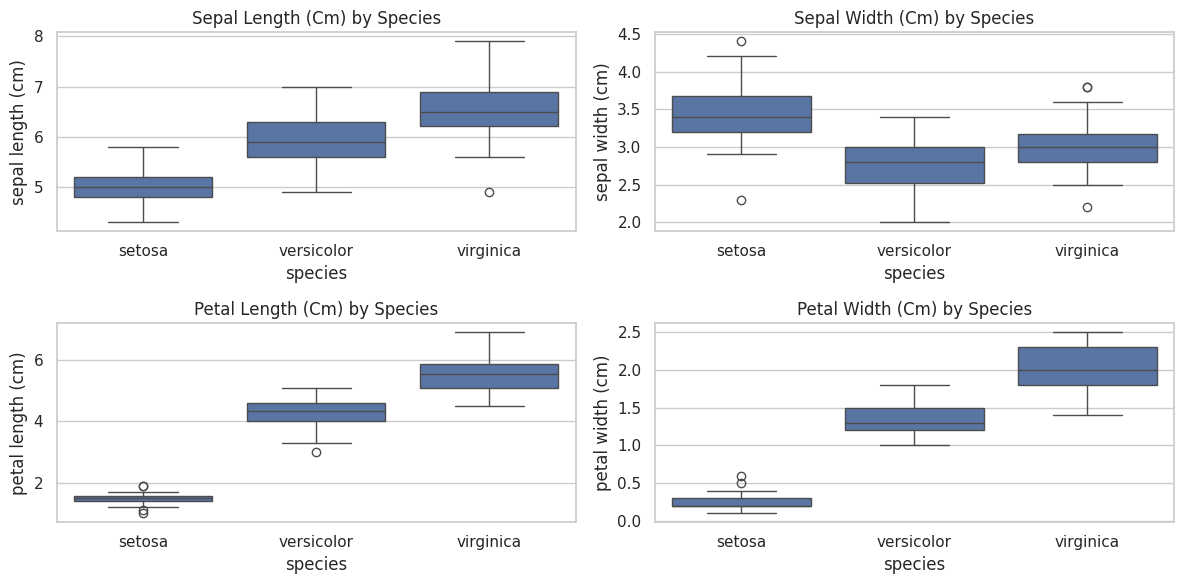

In [25]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='species', y=feature)
    plt.title(f'{feature.title()} by Species')
    plt.tight_layout()
plt.show()

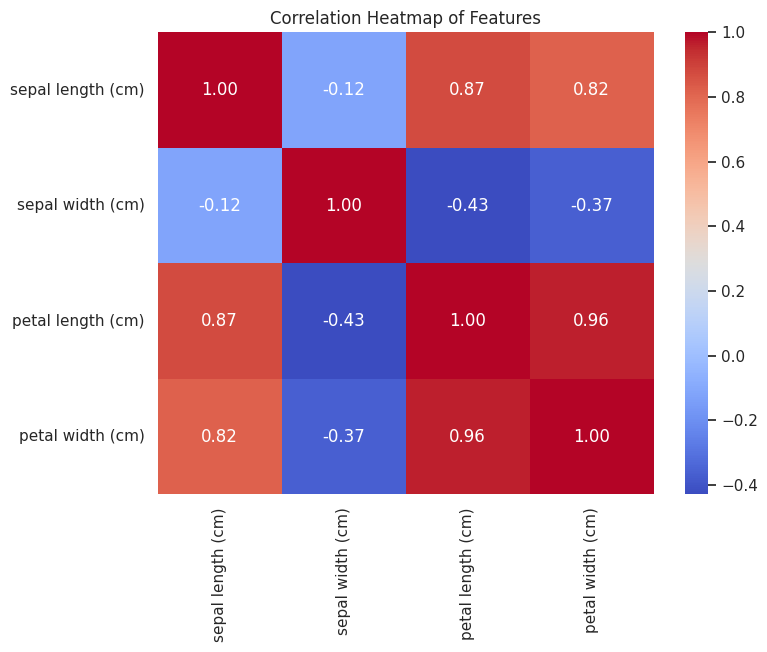

In [26]:
plt.figure(figsize=(8, 6))
corr = df.drop('species', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

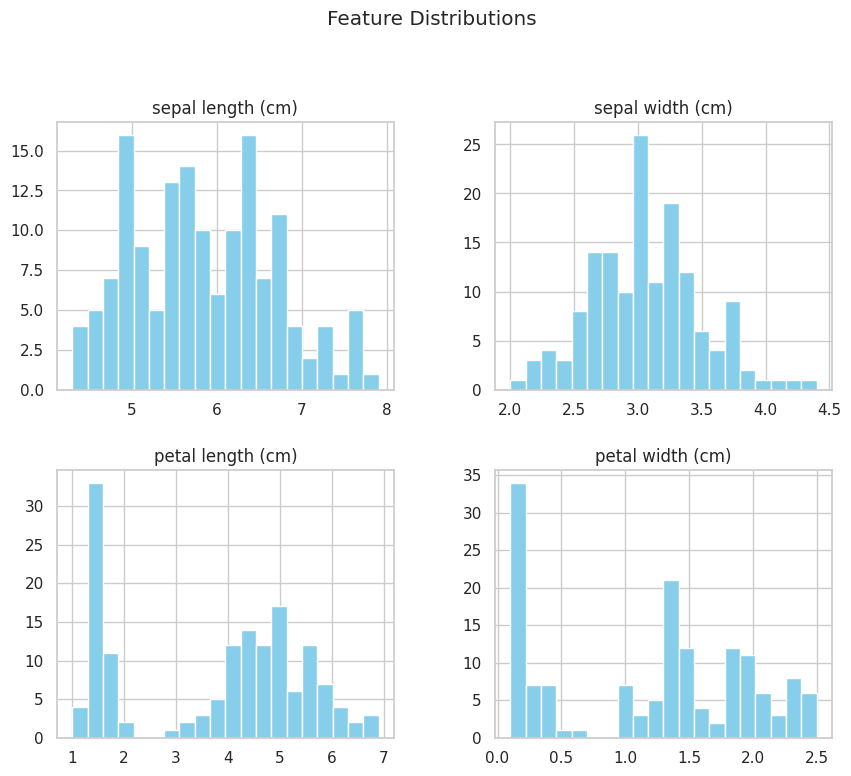

In [27]:
df.hist(figsize=(10, 8), bins=20, color='skyblue')
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

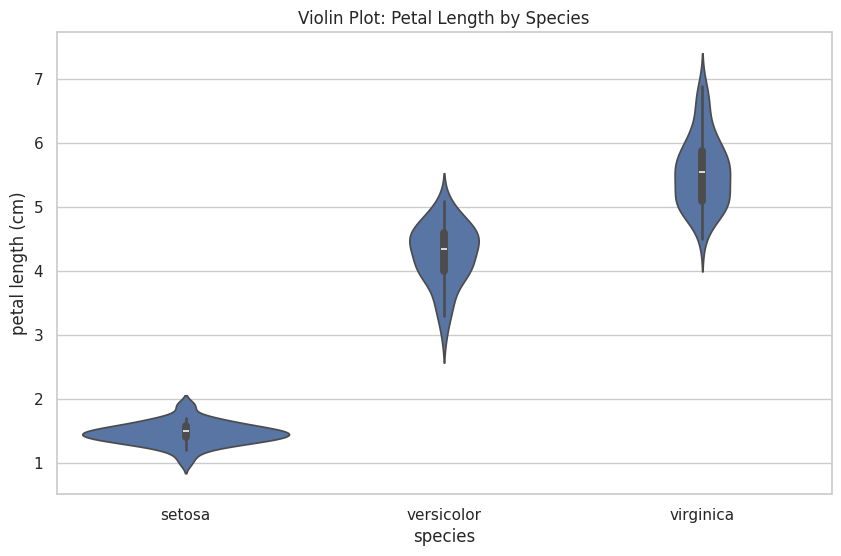

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='petal length (cm)', data=df)
plt.title("Violin Plot: Petal Length by Species")
plt.show()

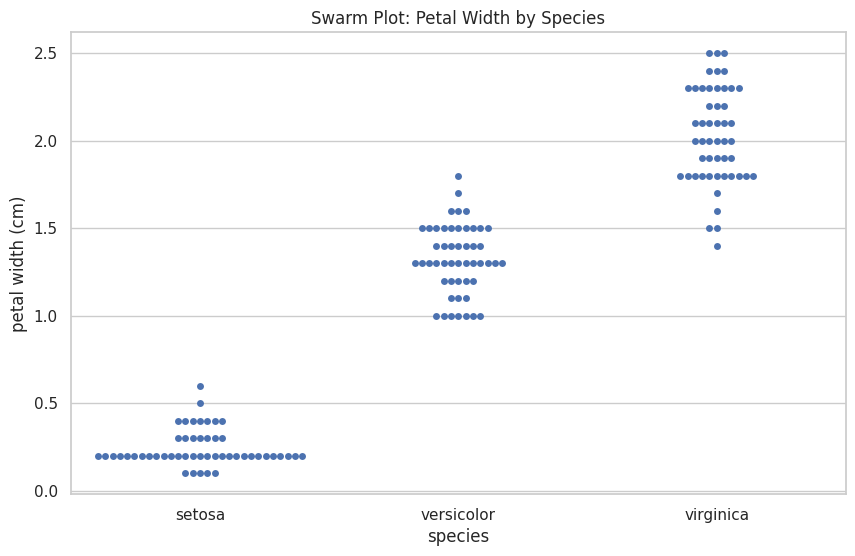

In [29]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='species', y='petal width (cm)', data=df)
plt.title("Swarm Plot: Petal Width by Species")
plt.show()

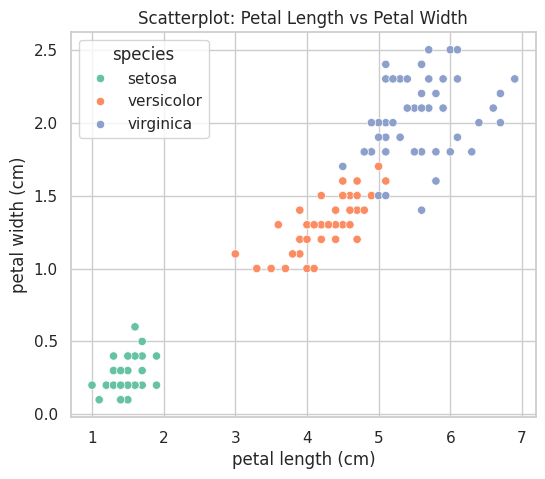

In [30]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='species',
    palette='Set2'
)
plt.title("Scatterplot: Petal Length vs Petal Width")
plt.show()

In [31]:
# Separate features and target
X = df.drop('species', axis=1)
y = df['species']

In [32]:
from sklearn.preprocessing import LabelEncoder

# Convert species names to numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [33]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

In [34]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression model
logreg_model = LogisticRegression(max_iter=200)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [37]:
from sklearn.svm import SVC

# Initialize and train SVM model
svm_model = SVC(kernel='linear')  # You can try 'rbf' later too
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, model_name="Model"):
    """
    Evaluates a classification model using accuracy, classification report, and confusion matrix.

    Parameters:
    - model: Trained classification model
    - X_test: Test features
    - y_test: True test labels
    - model_name: Name of the model (for display)
    """
    print(f"\n🔍 Evaluation Results for {model_name}:")

    # Make predictions
    y_pred = model.predict(X_test)

    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {accuracy:.2f}")

    # Classification report
    print("\n📊 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    disp.plot(cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()


🔍 Evaluation Results for K-Nearest Neighbors:
✅ Accuracy: 0.93

📊 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



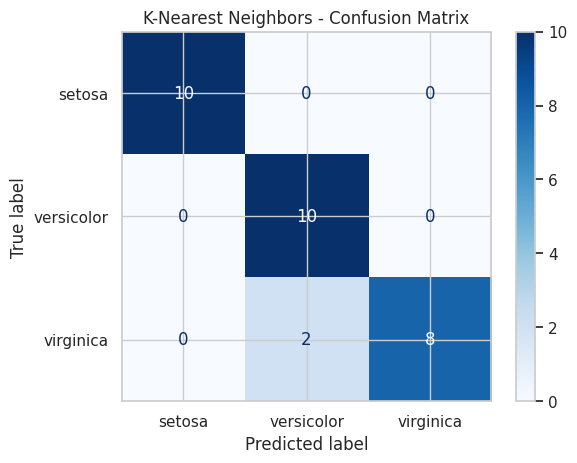

In [39]:
evaluate_model(knn_model, X_test, y_test, "K-Nearest Neighbors")


🔍 Evaluation Results for Logistic Regression:
✅ Accuracy: 0.93

📊 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



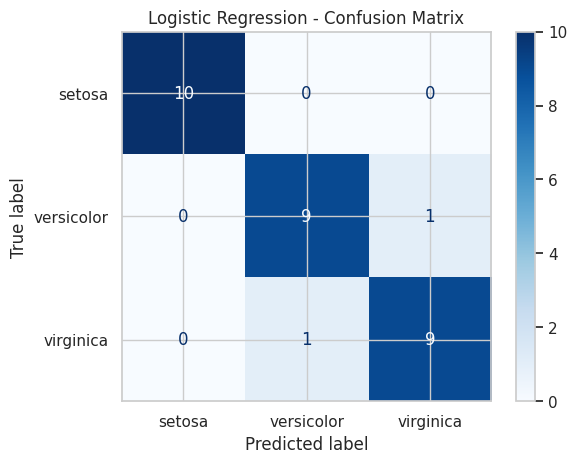

In [40]:
evaluate_model(logreg_model, X_test, y_test, "Logistic Regression")


🔍 Evaluation Results for Support Vector Machine:
✅ Accuracy: 1.00

📊 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



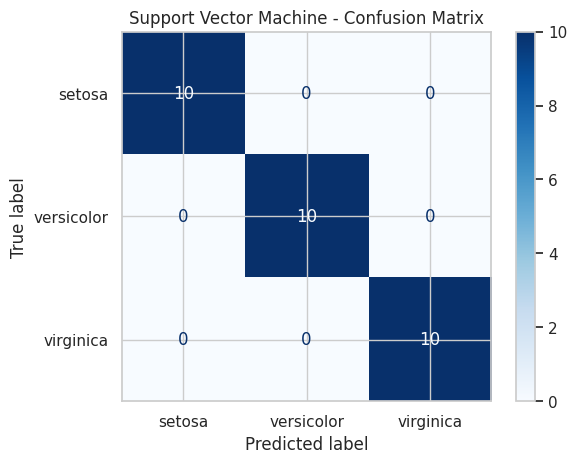

In [41]:
evaluate_model(svm_model, X_test, y_test, "Support Vector Machine")

In [43]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

